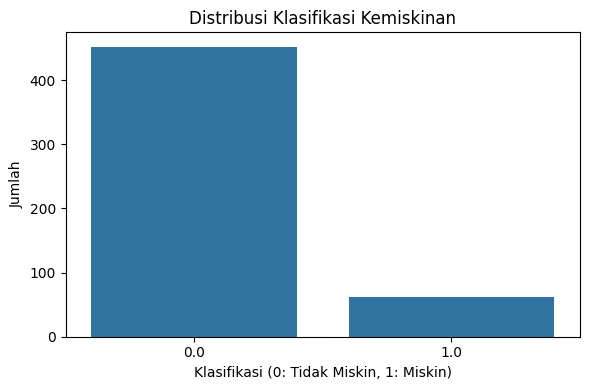

<Figure size 1000x800 with 0 Axes>

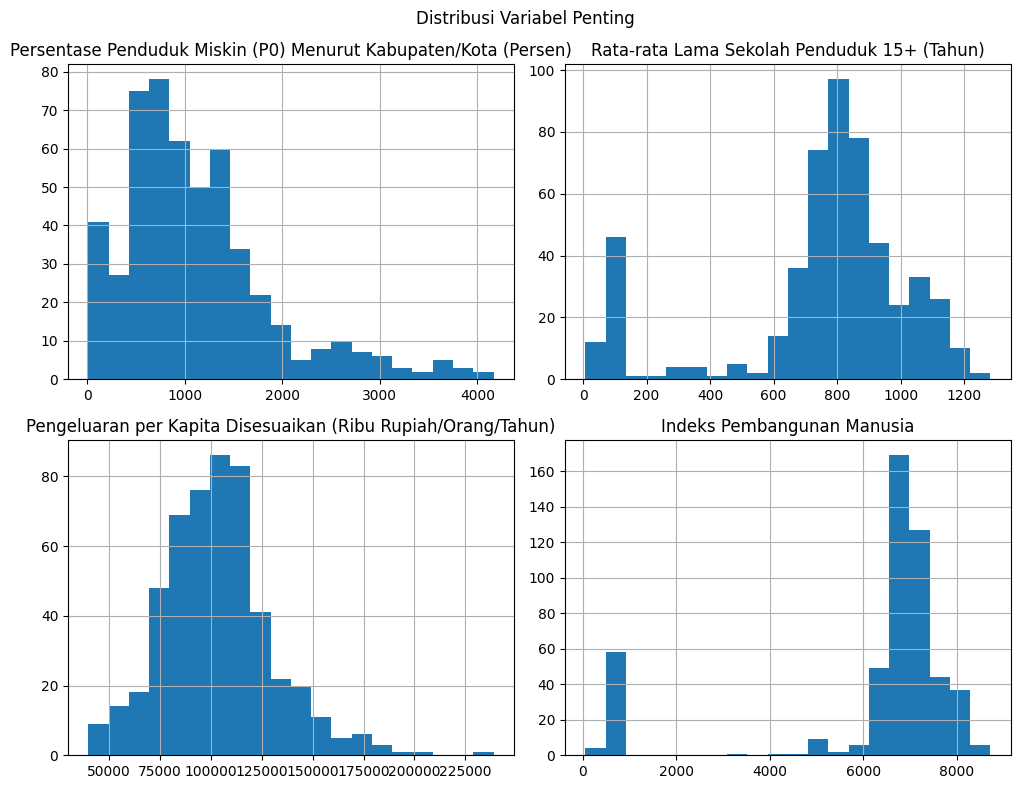

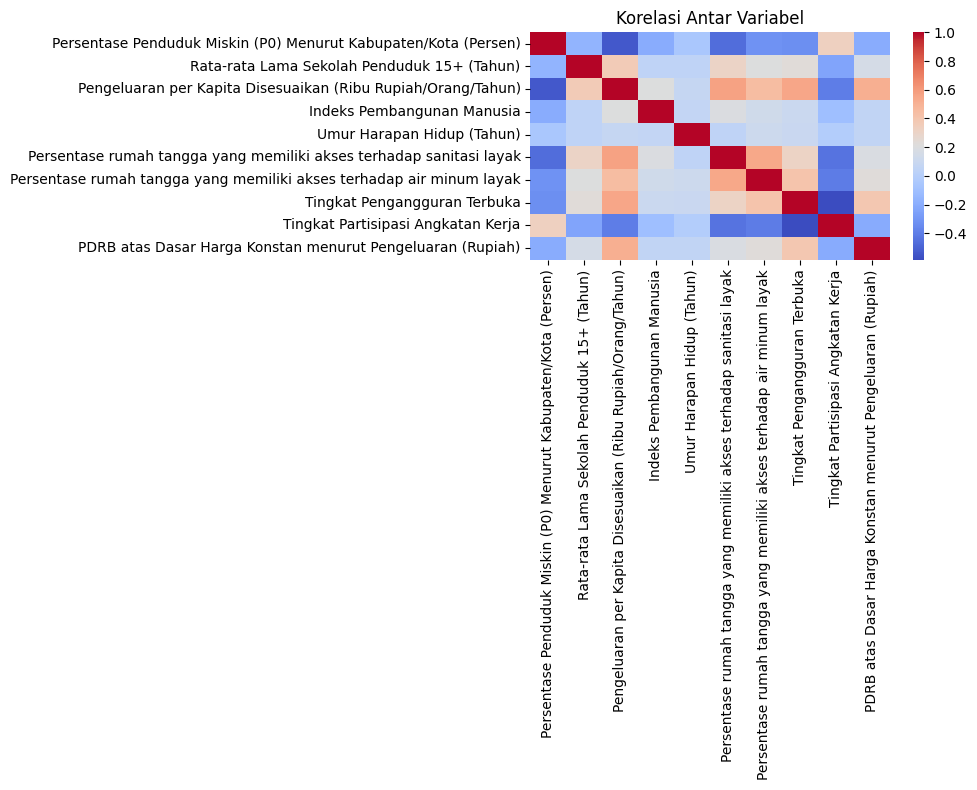

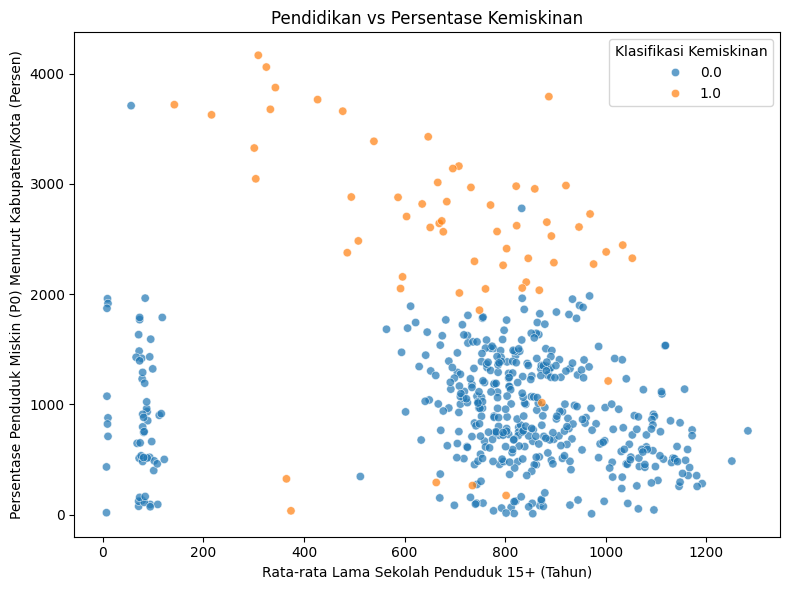

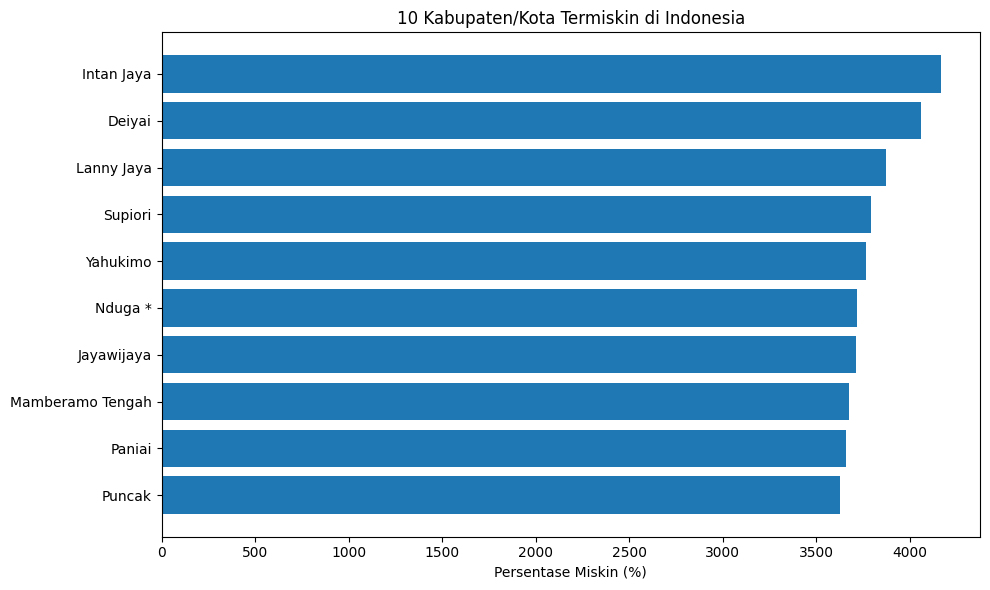

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data
df = pd.read_csv('Klasifikasi Tingkat Kemiskinan di Indonesia.csv', sep=';')

# Bersihkan dan ubah tipe data
df = df.dropna(how='all')  # Hapus baris kosong
df = df.replace(',', '.', regex=True)

# Pastikan numeric_cols didefinisikan
numeric_cols = [
    'Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)',
    'Rata-rata Lama Sekolah Penduduk 15+ (Tahun)',
    'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)',
    'Indeks Pembangunan Manusia',
    'Umur Harapan Hidup (Tahun)',
    'Persentase rumah tangga yang memiliki akses terhadap sanitasi layak',
    'Persentase rumah tangga yang memiliki akses terhadap air minum layak',
    'Tingkat Pengangguran Terbuka',
    'Tingkat Partisipasi Angkatan Kerja',
    'PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)'
]

# Konversi kolom ke numerik
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace('.', '', regex=False)
    df[col] = df[col].str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=numeric_cols)  # Hapus baris yang ada NaN

# Kolom target
target_col = 'Klasifikasi Kemiskinan'

# --- Validasi: Pastikan kolom 'Kab/Kota' ada, kalau tidak ganti dengan yang benar ---
if 'Kab/Kota' not in df.columns:
    print("Kolom 'Kab/Kota' tidak ditemukan. Kolom yang tersedia:")
    print(df.columns)
else:
    # --- 1. Distribusi Klasifikasi Kemiskinan ---
    plt.figure(figsize=(6, 4))
    sns.countplot(x=target_col, data=df)
    plt.title('Distribusi Klasifikasi Kemiskinan')
    plt.xlabel('Klasifikasi (0: Tidak Miskin, 1: Miskin)')
    plt.ylabel('Jumlah')
    plt.tight_layout()
    plt.show()

    # --- 2. Distribusi Beberapa Variabel Numerik ---
    plt.figure(figsize=(10, 8))
    df[numeric_cols[:4]].hist(bins=20, layout=(2, 2), figsize=(10, 8))
    plt.suptitle('Distribusi Variabel Penting')
    plt.tight_layout()
    plt.show()

    # --- 3. Korelasi Antar Variabel ---
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[numeric_cols].corr(), cmap='coolwarm', cbar=True)
    plt.title('Korelasi Antar Variabel')
    plt.tight_layout()
    plt.show()

    # --- 4. Hubungan Pendidikan vs Kemiskinan ---
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x='Rata-rata Lama Sekolah Penduduk 15+ (Tahun)',
        y='Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)',
        hue=target_col,
        data=df,
        alpha=0.7
    )
    plt.title('Pendidikan vs Persentase Kemiskinan')
    plt.tight_layout()
    plt.show()

    # --- 5. 10 Kabupaten/Kota dengan Persentase Kemiskinan Tertinggi ---
    top_miskin = df.sort_values(
        'Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)', 
        ascending=False
    ).head(10)

    plt.figure(figsize=(10, 6))
    plt.barh(
        top_miskin['Kab/Kota'],
        top_miskin['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)']
    )
    plt.xlabel('Persentase Miskin (%)')
    plt.title('10 Kabupaten/Kota Termiskin di Indonesia')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
